## Notebook setup

In [1]:
import os
import io
import warnings
import datetime
import numpy as np
import base64

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

# import sys
# sys.path.append('../../')

from openbb_terminal.api import widgets
from openbb_terminal.api import openbb
from openbb_terminal.helper_classes import TerminalStyle

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

WARNING! Breaking changes incoming! Especially avoid using kwargs, since some of them will change.
You can try <link> branch with the latest changes.


In [2]:
try:
    theme = TerminalStyle("light", "light", "light")
except:
    pass
stylesheet = widgets.html_report_stylesheet()
with open("./openbb_terminal/reports/OpenBB_reports_logo.png", "rb") as image_file:
    openbb_image_encoded = base64.b64encode(image_file.read())

FileNotFoundError: [Errno 2] No such file or directory: './openbb_terminal/reports/OpenBB_reports_logo.png'

## Select Ticker

In [5]:
# Parameters that will be replaced when calling this notebook
ticker = "EURUSD"
report_name = ""

In [6]:
author = "Henrique Joaquim"
report_title = f"INVESTMENT RESEARCH REPORT ON {ticker.upper()}"
report_date = datetime.datetime.now().strftime("%d %B, %Y")
report_time = datetime.datetime.now().strftime("%H:%M")
report_timezone = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
report_title, report_date, report_time, report_timezone

('INVESTMENT RESEARCH REPORT ON EURUSD',
 '25 August, 2022',
 '14:30',
 datetime.timezone(datetime.timedelta(seconds=3600), 'WEST'))

In [7]:
from_symbol = ticker[:3]
to_symbol = ticker[3:]
last_year = datetime.datetime.now() - datetime.timedelta(days=365)

ticker_data = openbb.forex.load(
    from_symbol=from_symbol,
    to_symbol=to_symbol,
    start_date=last_year.strftime("%Y-%m-%d"),
    interval="1day",
    resolution="d",
)

# 1 year historical data
ticker_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,1.175503,1.176055,1.172855,1.175309,1.175309,0
2021-08-26,1.177300,1.178134,1.174784,1.177440,1.177440,0
2021-08-27,1.175295,1.180359,1.173599,1.175641,1.175641,0
2021-08-30,1.179997,1.181195,1.178453,1.179901,1.179901,0
2021-08-31,1.179941,1.184553,1.179649,1.179690,1.179690,0
...,...,...,...,...,...,...
2022-08-19,1.008990,1.011225,1.003623,1.008990,1.008990,0
2022-08-22,1.003522,1.004823,0.992773,1.003522,1.003522,0
2022-08-23,0.993947,1.001904,0.990315,0.993947,0.993947,0


## Data

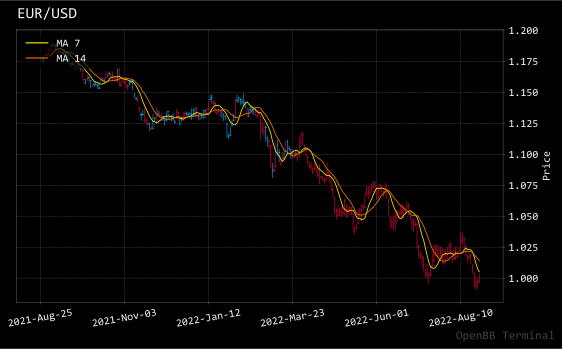

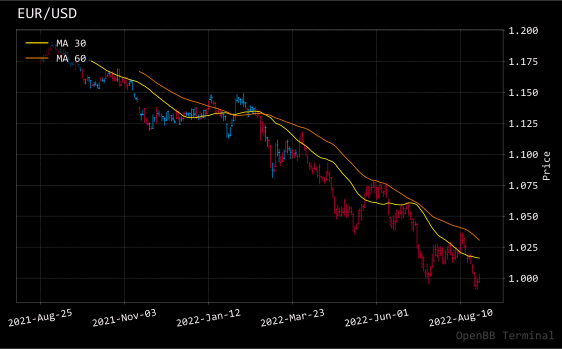

(None, None)

In [8]:
candle_ma_7_14 = openbb.forex.candle(
    data=ticker_data,
    to_symbol=to_symbol,
    from_symbol=from_symbol,
    ma=[7, 14],
    chart=True,
)

candle_ma_30_60 = openbb.forex.candle(
    data=ticker_data,
    to_symbol=to_symbol,
    from_symbol=from_symbol,
    ma=[30, 60],
    chart=True,
)

# candle graph with moving averages 7/14 and 30/60
candle_ma_7_14, candle_ma_30_60

In [10]:
fwd = openbb.forex.oanda.fwd(
    to_symbol=to_symbol,
    from_symbol=from_symbol,
)

# forward rates
fwd

,Ask,Bid,Mid,Points
Expiration,,,,
Overnight,0.99618,0.99611,0.99614,0.6475
Tomorrow Next,0.99630,0.99623,0.99627,1.9400
Spot Next,0.99618,0.99611,0.99614,0.6495
One Week,0.99664,0.99657,0.99660,5.2950
Two Weeks,0.99705,0.99697,0.99701,9.3150
Three Weeks,0.99744,0.99737,0.99740,13.2850
One Month,0.99810,0.99801,0.99806,19.7990
Two Months,1.00050,1.00041,1.00046,43.8000
Three Months,1.00264,1.00249,1.00257,64.9230


## Render the report template to a file

In [ ]:
body = ""

img = f'<img src="data:image/png;base64,{openbb_image_encoded.decode()}" alt="OpenBB" style="width:144px;">'
body += widgets.header(
    img,
    author,
    report_date,
    report_time,
    report_timezone,
    f"<b>INVESTMENT RESEARCH REPORT:</b> {ticker}",
)

body += widgets.tablinks(
    [
        "SUMMARY",
        "Overview",
        "Analyst Opinions",
        "Fundamental Analysis",
        "Dark Pool and Shorts",
        "Technical Analysis",
        "Insider Trading",
        "Behavioural Analysis",
        "Quantitative Analysis",
        "Prediction Techniques",
    ]
)

htmlcode = widgets.h(3, "KPIs")
htmlcode += widgets.kpi(
    [last_price],
    [
        "Last closing price is above the average price ratings of last 30 days",
        "Average price ratings of last 30 day is above last closing price",
    ],
    avg_ratings_last_30_days,
)
if predictions:
    htmlcode += widgets.kpi(
        [0],
        [
            "Regression (dollars per market day) on last 30 market days is negative",
            "Regression (dollars per market day) on last 30 market days is positive",
        ],
        regression_slope,
    )
htmlcode += widgets.kpi(
    [30, 70],
    ["RSI level is oversold", "RSI level is normal", "RSI level is overbought"],
    rsi_value,
)
htmlcode += widgets.kpi(
    [0],
    [
        "The sum of last 10 insider trading (in millions) was negative",
        "The sum of last 10 insider trading (in millions) was positive",
    ],
    last_10_insider_trading,
)
htmlcode += widgets.kpi(
    [-0.1, 0.1],
    [
        "Last FinBrain sentiment is bearish",
        " Last FinBrain sentiment is neutral",
        "Last FinBrain sentiment is bullish",
    ],
    finbrain_sentiment_val,
)
if predictions:
    htmlcode += widgets.kpi(
        [0],
        [
            "The regression for the next 20th market price is below closing price",
            "The regression for the next 20th market price is above closing price",
        ],
        round(regression_val - last_price, 2),
    )
body += widgets.add_tab("SUMMARY", htmlcode)

htmlcode = widgets.row([price_chart])
htmlcode += widgets.row(
    [widgets.h(3, "Description") + widgets.p(overview)]
)
body += widgets.add_tab("Overview", htmlcode)

htmlcode = widgets.row([price_target_chart])
htmlcode += widgets.row([ratings_over_time_chart])
htmlcode += widgets.row([df_analyst.to_html()])
body += widgets.add_tab("Analyst Opinions", htmlcode)

htmlcode = widgets.row(
    [widgets.h(3, "Estimates") + df_year_estimates.head().to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Earnings") + df_quarter_earnings.head().to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Revenues") + df_quarter_revenues.head().to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "SEC filings") + df_sec_filings.to_html(escape=False)]
)
body += widgets.add_tab("Fundamental Analysis", htmlcode)

htmlcode = widgets.row([net_short_position])
htmlcode += widgets.row([price_vs_short_interest])
htmlcode += widgets.row([dark_pools])
body += widgets.add_tab("Dark Pool and Shorts", htmlcode)

body += widgets.add_tab("Technical Analysis", widgets.row([ta_rsi]))

htmlcode = widgets.row(
    [
        widgets.h(3, "Last Activity")
        + df_insider.head(10).to_html(col_space="75px")
    ]
)
body += widgets.add_tab("Insider Trading", htmlcode)

htmlcode = widgets.row([finbrain_sentiment])
htmlcode += widgets.row([snews])
htmlcode += widgets.row(
    [widgets.h(3, "Stocktwits") + stocktwits_sentiment]
)
body += widgets.add_tab("Behavioural Analysis", htmlcode)

# Deprecated in the new API
# htmlcode = widgets.row([bw_month])
# htmlcode += widgets.row([bw_year])
# body += widgets.add_tab("Quantitative Analysis", htmlcode)

if predictions:
    htmlcode = widgets.row([regression])
    htmlcode += widgets.row([mc])
else:
    htmlcode = widgets.row(["Prediction features not enabled."])
body += widgets.add_tab("Prediction Techniques", htmlcode)

body += widgets.tab_clickable_evt()

report = widgets.html_report(title=report_name, stylesheet=stylesheet, body=body)

# to save the results
with open(report_name + ".html", "w", encoding="utf-8") as fh:
    fh.write(report)